<a href="https://colab.research.google.com/github/Joshitha475/ML-labs/blob/main/5_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Centroids:
 [[ 0.95625704  4.37226546]
 [-1.60811992  2.85881658]
 [ 1.95159369  0.83467497]]

First 5 Rows of Data with Cluster Labels:
    Feature1  Feature2  Cluster
0  0.428577  4.973997        0
1  1.619909  0.067645        2
2  1.432893  4.376792        0
3 -1.578462  3.034458        1
4 -1.658629  2.267460        1


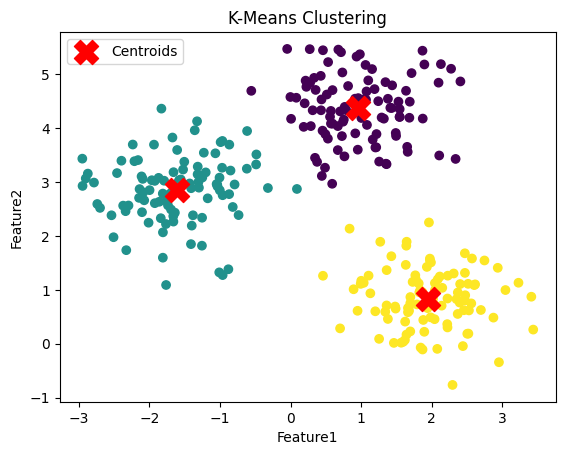

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a random dataset with 3 clusters
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Create KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(df)

# Get the cluster centers (centroids) and labels (cluster assignments)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Output the centroids and first few rows with cluster labels
print("Centroids:\n", centroids)
print("\nFirst 5 Rows of Data with Cluster Labels:\n", df.head())

# Visualize the clusters
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title("K-Means Clustering")
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()


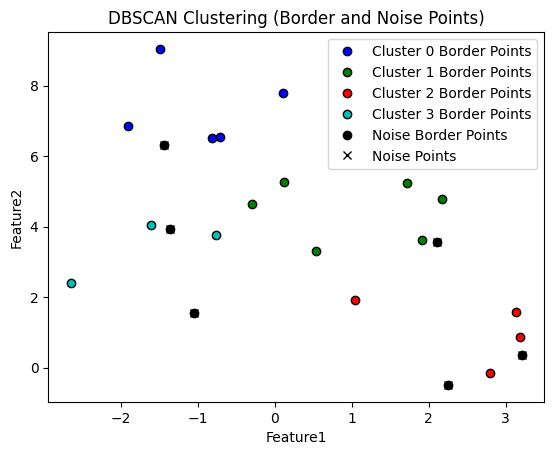


Border Points:
     Feature1  Feature2  Cluster
0    1.039925  1.929910        2
25  -0.300225  4.630597        1
28  -2.654686  2.406629        3
42   0.123135  5.279175        1
62  -1.499664  9.041687        0
88  -1.914362  6.851148        0
115  1.917845  3.629908        1
143 -1.605738  4.046244        3
144  1.720396  5.251732        1
152 -0.709157  6.555868        0
218  2.802510 -0.137329        2
226  0.532377  3.313389        1
242  3.184922  0.876535        2
249 -0.816958  6.507650        0
250  2.167842  4.776027        1
256 -0.766907  3.777677        3
274  3.136885  1.565928        2
298  0.099856  7.798498        0

Noise Points:
     Feature1  Feature2  Cluster
5    3.207226  0.367656       -1
166 -1.055381  1.548044       -1
174 -1.357452  3.928404       -1
205 -1.444450  6.312388       -1
273  2.111147  3.576604       -1
290  2.254791 -0.488633       -1


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate a random dataset with 4 clusters
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Create DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
labels = dbscan.fit_predict(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Get the core samples mask to exclude core points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting border points and noise points
unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot each cluster with different color (excluding core points)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points
        col = 'k'
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'

    # Extract border points and noise (exclude core points)
    class_member_mask = (labels == k)
    border_points = data[class_member_mask & ~core_samples_mask]

    # Plot border points
    plt.plot(border_points[:, 0], border_points[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6, label=f'{label} Border Points')

# Plot noise points
noise_points = data[labels == -1]
plt.plot(noise_points[:, 0], noise_points[:, 1], 'x', markerfacecolor='k',
         markeredgecolor='k', markersize=6, label='Noise Points')

plt.title('DBSCAN Clustering (Border and Noise Points)')
plt.legend(loc='best')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Output the noise points and border points
border_points_df = df[~core_samples_mask & (labels != -1)]
noise_points_df = df[labels == -1]

print("\nBorder Points:")
print(border_points_df)

print("\nNoise Points:")
print(noise_points_df)


<ipython-input-8-7cc526624e9f>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


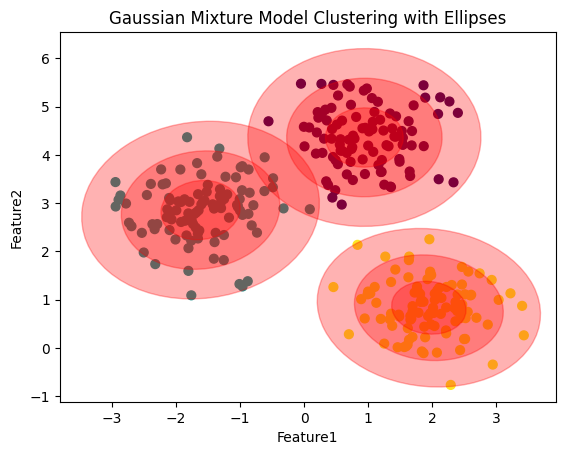

Gaussian Mixture Means (Centroids):
[[ 0.94393824  4.35978018]
 [-1.61784998  2.85597365]
 [ 1.95253705  0.83335473]]

Covariances of Gaussian Components:
[[[ 0.36932077  0.00065171]
  [ 0.00065171  0.37684139]]

 [[ 0.38389149  0.0297875 ]
  [ 0.0297875   0.37625702]]

 [[ 0.33862817 -0.02583839]
  [-0.02583839  0.29963138]]]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Generate a random dataset with 3 clusters
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Fit Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(df)

# Predict the cluster for each point
labels = gmm.predict(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Function to draw the ellipses for each Gaussian component
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance."""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):  # Draw 1, 2, and 3 standard deviation ellipses
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

# Scatter plot of the data points with cluster labels
plt.scatter(df['Feature1'], df['Feature2'], c=labels, cmap='viridis', s=40)

# Plot the Gaussian ellipses
ax = plt.gca()

for i in range(3):  # For each Gaussian component
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    draw_ellipse(mean, cov, ax=ax, alpha=0.3, color='red')

plt.title("Gaussian Mixture Model Clustering with Ellipses")
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Output the predicted cluster centers
print("Gaussian Mixture Means (Centroids):")
print(gmm.means_)

print("\nCovariances of Gaussian Components:")
print(gmm.covariances_)


<ipython-input-10-401876e03be4>:47: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


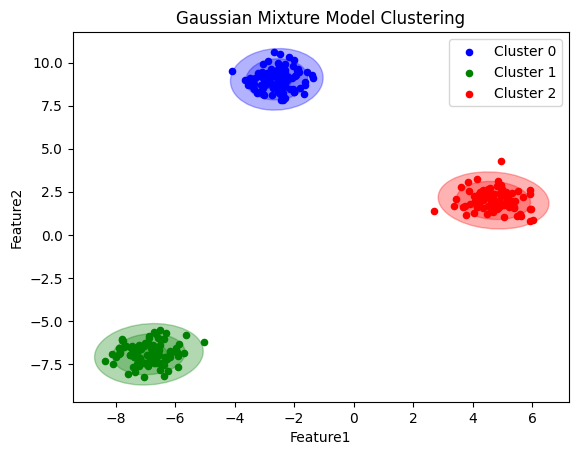

Cluster Means (Centroids):
 [[-2.58361866  9.03185632]
 [-6.88217395 -6.94243433]
 [ 4.70421356  1.99562444]]

Cluster Covariances (Shapes of Gaussians):
 [[[ 0.26952915  0.01572624]
  [ 0.01572624  0.35537521]]

 [[ 0.3706632   0.03446655]
  [ 0.03446655  0.35379858]]

 [[ 0.38532143 -0.03543947]
  [-0.03543947  0.30601282]]]


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Generate a random dataset with 3 clusters
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Create Gaussian Mixture Model with 3 components (clusters)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)

# Fit the model to the data
gmm.fit(df)

# Predict the cluster for each data point
labels = gmm.predict(df)

# Add the predicted cluster labels to the DataFrame
df['Cluster'] = labels

# Output the means (centroids) and covariances of the Gaussians
means = gmm.means_
covariances = gmm.covariances_

# Plotting
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse representing the covariance matrix."""
    ax = ax or plt.gca()

    # Convert covariance matrix to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

# Create plot
fig, ax = plt.subplots()

# Plot the points with colors representing clusters
colors = ['blue', 'green', 'red']
for label, color in zip(np.unique(labels), colors):
    cluster_points = df[df['Cluster'] == label]
    plt.scatter(cluster_points['Feature1'], cluster_points['Feature2'],
                s=20, c=color, label=f'Cluster {label}')

# Plot Gaussian ellipses
for pos, covar, color in zip(means, covariances, colors):
    draw_ellipse(pos, covar, alpha=0.3, color=color)

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='best')
plt.show()

# Output the means (centroids) and covariances of the clusters
print("Cluster Means (Centroids):\n", means)
print("\nCluster Covariances (Shapes of Gaussians):\n", covariances)


Explained Variance Ratio by Principal Components:
 [0.89108496 0.09814837]


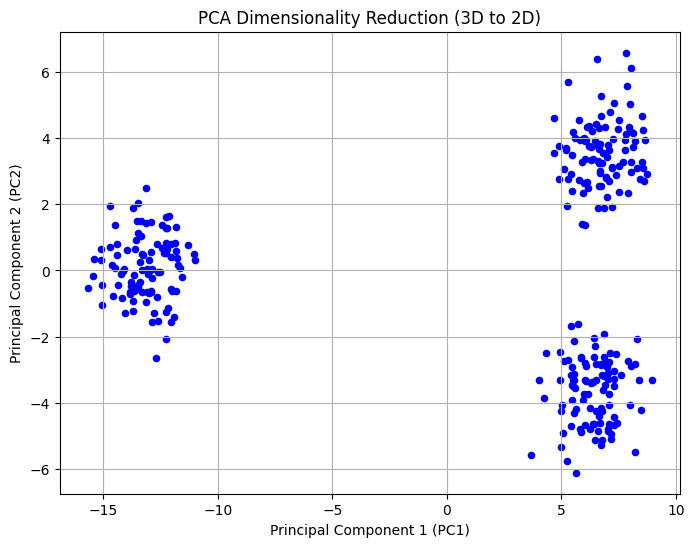


PCA Components (Principal Axes):
 [[-0.38451043  0.76093973  0.52261119]
 [ 0.91254789  0.22788812  0.33959293]]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate a random dataset with 3 features
data, _ = make_blobs(n_samples=300, n_features=3, centers=3, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# Create PCA model to reduce from 3 dimensions to 2 dimensions
pca = PCA(n_components=2)

# Fit PCA model and transform the data
pca_data = pca.fit_transform(df)

# Convert the PCA results into a DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Output the explained variance ratio (how much variance is captured by each component)
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio by Principal Components:\n", explained_variance)

# Plot the reduced data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', s=20)
plt.title('PCA Dimensionality Reduction (3D to 2D)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

# Output the PCA components (directions of maximum variance)
print("\nPCA Components (Principal Axes):\n", pca.components_)


Original Data:
    Feature1  Feature2  Feature3  Feature4
0  0.374540  0.950714  0.731994  0.598658
1  0.156019  0.155995  0.058084  0.866176
2  0.601115  0.708073  0.020584  0.969910
3  0.832443  0.212339  0.181825  0.183405
4  0.304242  0.524756  0.431945  0.291229

W (Sample x Component):
    Component1  Component2
0    0.532441    0.722507
1    0.764117    0.000000
2    1.053725    0.205290
3    0.344403    0.290936
4    0.277440    0.439448

H (Component x Feature):
             Feature1  Feature2  Feature3  Feature4
Component1  0.416881  0.358556  0.000000  0.987715
Component2  0.506877  0.985250  0.921483  0.000000

Reconstructed Data (Approximation):
    Feature1  Feature2  Feature3  Feature4
0  0.588187  0.902759  0.665778  0.525900
1  0.318546  0.273978  0.000000  0.754730
2  0.543334  0.580081  0.189171  1.040780
3  0.291044  0.410132  0.268092  0.340172
4  0.338406  0.532444  0.404944  0.274032


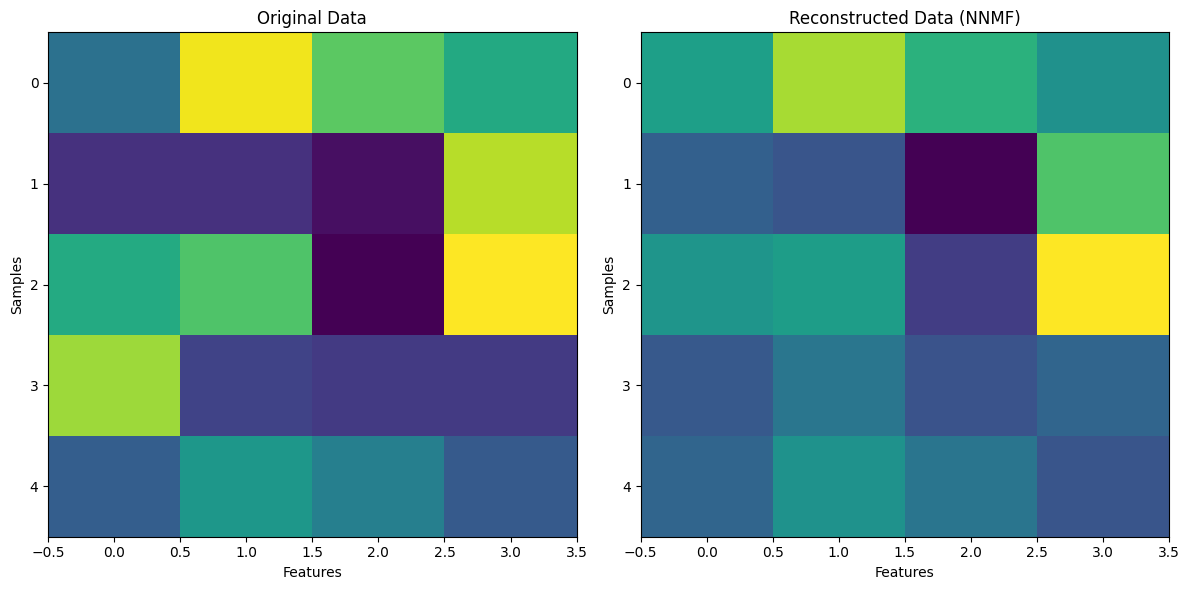

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# Create a random non-negative dataset (5 samples, 4 features)
np.random.seed(42)
data = np.random.rand(5, 4)  # Random values between 0 and 1

# Convert to DataFrame for clarity
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

# Specify the number of components (rank for factorization)
n_components = 2

# Create the NMF model
nmf = NMF(n_components=n_components, init='random', random_state=42)

# Fit the model and transform the data
W = nmf.fit_transform(df)  # W matrix (samples x components)
H = nmf.components_         # H matrix (components x features)

# Convert W and H into DataFrames for better readability
W_df = pd.DataFrame(W, columns=[f'Component{i+1}' for i in range(n_components)])
H_df = pd.DataFrame(H, columns=df.columns, index=[f'Component{i+1}' for i in range(n_components)])

# Print the factorized matrices W and H
print("Original Data:\n", df)
print("\nW (Sample x Component):\n", W_df)
print("\nH (Component x Feature):\n", H_df)

# Reconstruct the original data from W and H
reconstructed_data = np.dot(W, H)
reconstructed_df = pd.DataFrame(reconstructed_data, columns=df.columns)

print("\nReconstructed Data (Approximation):\n", reconstructed_df)

# Plot the original and reconstructed data
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot original data
axs[0].imshow(df, cmap='viridis', aspect='auto')
axs[0].set_title('Original Data')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Samples')

# Plot reconstructed data
axs[1].imshow(reconstructed_df, cmap='viridis', aspect='auto')
axs[1].set_title('Reconstructed Data (NNMF)')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Samples')

plt.tight_layout()
plt.show()
